# Previsão de Fechamento Diário da IBOVESPA

## Introdução

O objetivo deste projeto é desenvolver um modelo preditivo para prever o fechamento diário da IBOVESPA utilizando dados históricos.

## Coleta de Dados

Os dados foram capturados do site Investing.com, abrangendo o período de 01/01/2000 a 01/01/2024.

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
df_path = "C:\\Users\\tamir\\OneDrive\\Área de Trabalho\\Dados Históricos - Ibovespa.csv"

In [59]:
dados = pd.read_csv(df_path, sep=',', parse_dates=[0], index_col='Data')

C:\Users\tamir\AppData\Local\Temp\ipykernel_16556\2815251428.py:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dados = pd.read_csv(df_path, sep=',', parse_dates=[0], index_col='Data')


In [69]:
dados.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2023-12-28,134.185,134.194,134.392,133.832,7810000.0,-0.01
2023-12-27,134.194,133.523,134.195,133.328,6170000.0,0.50
2023-12-26,133.533,132.753,133.645,132.753,5150000.0,0.59
2023-12-22,132.753,132.182,133.035,132.094,8230000.0,0.43
2023-12-21,132.182,130.826,132.277,130.822,8680000.0,1.05


In [60]:
dados.tail()


,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2020-01-08,116.247,116.667,117.335,115.693,"5,91M","-0,36%"
2020-01-07,116.662,116.872,117.076,115.965,"4,85M","-0,18%"
2020-01-06,116.878,117.707,117.707,116.269,"6,57M","-0,70%"
2020-01-03,117.707,118.564,118.792,117.341,"6,83M","-0,73%"
2020-01-02,118.573,115.652,118.573,115.649,"5,16M","2,53%"


In [61]:
dados.shape

(994, 6)

## Exploração e limpeza dos dados

In [62]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 994 entries, 2023-12-28 to 2020-01-02
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Último    994 non-null    float64
 1   Abertura  994 non-null    float64
 2   Máxima    994 non-null    float64
 3   Mínima    994 non-null    float64
 4   Vol.      994 non-null    object 
 5   Var%      994 non-null    object 
dtypes: float64(4), object(2)
memory usage: 54.4+ KB


In [63]:
def convert_to_float(value):
    if isinstance(value, str):
        value = value.replace('.', '').replace(',', '.')
        if 'M' in value:
            return float(value.replace('M', '')) * 1_000_000
        elif 'K' in value:
            return float(value.replace('K', '')) * 1_000
    return value

In [64]:
dados['Vol.'] = dados['Vol.'].apply(convert_to_float)
print(dados.head())

             Último  Abertura   Máxima   Mínima       Vol.    Var%
Data                                                              
2023-12-28  134.185   134.194  134.392  133.832  7810000.0  -0,01%
2023-12-27  134.194   133.523  134.195  133.328  6170000.0   0,50%
2023-12-26  133.533   132.753  133.645  132.753  5150000.0   0,59%
2023-12-22  132.753   132.182  133.035  132.094  8230000.0   0,43%
2023-12-21  132.182   130.826  132.277  130.822  8680000.0   1,05%


In [65]:
def convert_percentage_to_float(value):
    if isinstance(value, str) and '%' in value:
        value = value.replace('%', '').replace(',', '.')
        if '-' in value:
            value = value.replace('-', '')
            return float(value) * -1
        else:
            return float(value)
    return value

In [66]:
dados['Var%'] = dados['Var%'].apply(convert_percentage_to_float)

print(dados.head())

             Último  Abertura   Máxima   Mínima       Vol.  Var%
Data                                                            
2023-12-28  134.185   134.194  134.392  133.832  7810000.0 -0.01
2023-12-27  134.194   133.523  134.195  133.328  6170000.0  0.50
2023-12-26  133.533   132.753  133.645  132.753  5150000.0  0.59
2023-12-22  132.753   132.182  133.035  132.094  8230000.0  0.43
2023-12-21  132.182   130.826  132.277  130.822  8680000.0  1.05


In [67]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 994 entries, 2023-12-28 to 2020-01-02
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Último    994 non-null    float64
 1   Abertura  994 non-null    float64
 2   Máxima    994 non-null    float64
 3   Mínima    994 non-null    float64
 4   Vol.      994 non-null    float64
 5   Var%      994 non-null    float64
dtypes: float64(6)
memory usage: 54.4 KB


In [68]:
dados.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2023-12-28,134.185,134.194,134.392,133.832,7810000.0,-0.01
2023-12-27,134.194,133.523,134.195,133.328,6170000.0,0.50
2023-12-26,133.533,132.753,133.645,132.753,5150000.0,0.59
2023-12-22,132.753,132.182,133.035,132.094,8230000.0,0.43
2023-12-21,132.182,130.826,132.277,130.822,8680000.0,1.05


In [70]:
dados.describe()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
count,994.000000,994.000000,994.000000,994.000000,9.940000e+02,994.000000
mean,109.835772,109.817676,110.896315,108.749022,1.121133e+07,0.030855
std,11.498674,11.474055,11.212105,11.718258,3.067441e+06,1.771678
min,63.570000,63.604000,67.604000,61.691000,3.840000e+06,-14.780000
25%,103.719250,103.719750,104.921250,102.571500,9.100000e+06,-0.800000
50%,111.644500,111.645000,112.702000,110.512500,1.096500e+07,0.050000
75%,117.521750,117.519750,118.319500,116.553500,1.293000e+07,0.960000
max,134.194000,134.194000,134.392000,133.832000,2.603000e+07,13.910000


In [71]:
dados.isnull().sum()

Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        0
Var%        0
dtype: int64

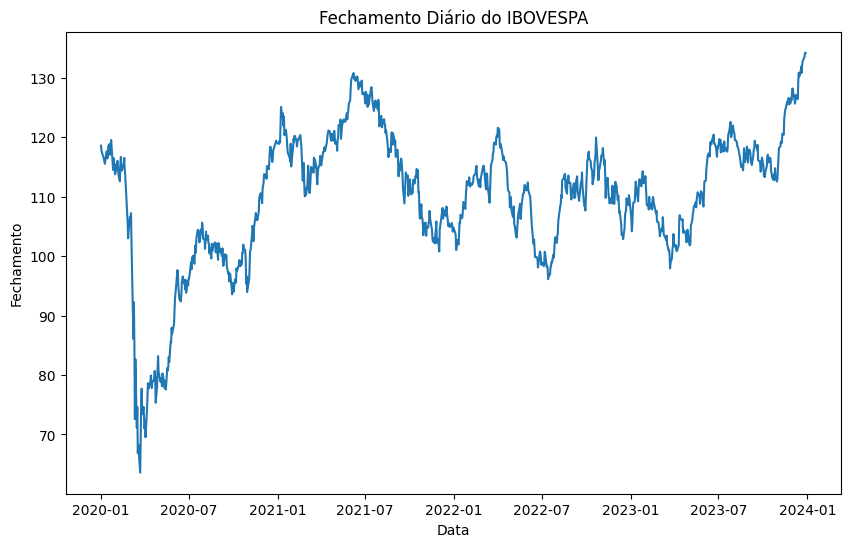

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(dados['Último'])
plt.title('Fechamento Diário do IBOVESPA')
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.show()